In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from datetime import date
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew 
from scipy.stats import kurtosis
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
Random_seed=random.randint(1,100)
Random_seed

42

In [3]:
df=pd.read_csv("GLDAS_Algiers.csv")

In [4]:
df.head()

date     city  ACond_tavg  AvgSurfT_tavg  CanopInt_tavg   ECanop_tavg  \
0  10-01-01  Algeirs    0.082993     286.687545       0.017668  6.106833e-06   
1  10-01-02  Algeirs    0.033933     286.336357       0.013592  2.220712e-06   
2  10-01-03  Algeirs    0.017356     285.944329       0.002365  2.569379e-08   
3  10-01-04  Algeirs    0.019539     288.113141       0.002453  1.132388e-07   
4  10-01-05  Algeirs    0.059151     287.461861       0.020187  4.647594e-06   

   ESoil_tavg  EvapSnow_tavg  Evap_tavg    GWS_tavg  ...       Qs_tavg  \
0    0.000015            0.0   0.000022  655.390076  ...  1.845114e-06   
1    0.000008            0.0   0.000012  655.785311  ...  1.130567e-07   
2    0.000007            0.0   0.000009  656.091261  ...  0.000000e+00   
3    0.000011            0.0   0.000014  656.280887  ...  1.852611e-08   
4    0.000013            0.0   0.000020  656.415591  ...  1.905058e-06   

   SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  SoilMoist_RZ_tavg  \
0             0.0  286.687545        889.618471         234.228496   
1             0.0  286.336357        889.981110         234.195734   
2             0.0  285.944329        889.438253         233.346994   
3             0.0  288.113141        888.647073         232.366208   
4             0.0  287.461861        889.658359         233.242742   

   SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg    TWS_tavg  
0          5.058322       0.0   71.386511   0.000001  889.636240  
1          4.770398       0.0   73.100717   0.000002  889.994643  
2          4.729158       0.0   95.803675   0.000003  889.440639  
3          4.674092       0.0   88.986264   0.000003  888.649558  
4          5.058011       0.0   72.314331   0.000002  889.678507  

[5 rows x 26 columns]

In [5]:
df.columns

Index(['date', 'city', 'ACond_tavg', 'AvgSurfT_tavg', 'CanopInt_tavg',
       'ECanop_tavg', 'ESoil_tavg', 'EvapSnow_tavg', 'Evap_tavg', 'GWS_tavg',
       'Lwnet_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qsb_tavg', 'Qsm_tavg',
       'Qs_tavg', 'SnowDepth_tavg', 'SnowT_tavg', 'SoilMoist_P_tavg',
       'SoilMoist_RZ_tavg', 'SoilMoist_S_tavg', 'SWE_tavg', 'Swnet_tavg',
       'TVeg_tavg', 'TWS_tavg'],
      dtype='object')

In [6]:
df.describe()

ACond_tavg  AvgSurfT_tavg  CanopInt_tavg   ECanop_tavg   ESoil_tavg  \
count  4929.000000    4929.000000    4929.000000  4.929000e+03  4929.000000   
mean      0.027671     293.280930       0.013565  1.526732e-06     0.000013   
std       0.012665       6.873357       0.021231  2.190291e-06     0.000005   
min       0.006431     276.692419       0.000014 -5.426048e-08     0.000003   
25%       0.019080     287.425346       0.000769  1.388765e-08     0.000009   
50%       0.024459     292.474395       0.003750  4.126442e-07     0.000013   
75%       0.032703     299.394434       0.016614  2.305439e-06     0.000016   
max       0.096481     309.055053       0.123301  1.075018e-05     0.000035   

       EvapSnow_tavg    Evap_tavg     GWS_tavg   Lwnet_tavg      Qg_tavg  ...  \
count   4.929000e+03  4929.000000  4929.000000  4929.000000  4929.000000  ...   
mean    5.672054e-12     0.000018   632.167487   -53.238216     0.031247  ...   
std     4.708539e-10     0.000008    47.100998    20.233416     7.888010  ...   
min    -4.585310e-09     0.000004   541.784971   -98.741738   -31.625584  ...   
25%     0.000000e+00     0.000012   591.645508   -68.730825    -4.904036  ...   
50%     0.000000e+00     0.000017   630.782553   -56.175925     0.196560  ...   
75%     0.000000e+00     0.000022   666.914663   -39.663934     5.444052  ...   
max     3.273594e-08     0.000064   736.328520    16.565141    28.209463  ...   

            Qs_tavg  SnowDepth_tavg   SnowT_tavg  SoilMoist_P_tavg  \
count  4.929000e+03    4.929000e+03  4929.000000       4929.000000   
mean   1.602038e-06    1.414961e-07   293.280930        851.572296   
std    6.259012e-06    8.175593e-06     6.873357         64.567153   
min    0.000000e+00    0.000000e+00   276.692419        731.993671   
25%    0.000000e+00    0.000000e+00   287.425346        795.395706   
50%    7.494909e-09    0.000000e+00   292.474395        849.819264   
75%    3.220404e-07    0.000000e+00   299.394434        901.050292   
max    1.681358e-04    5.636948e-04   309.055053       1001.101148   

       SoilMoist_RZ_tavg  SoilMoist_S_tavg     SWE_tavg   Swnet_tavg  \
count        4929.000000       4929.000000  4929.000000  4929.000000   
mean          219.404805          4.353002     0.000021   161.017174   
std            20.594767          0.738221     0.001226    66.099843   
min           189.659499          2.537107     0.000000     9.076511   
25%           199.851751          3.775585     0.000000   100.428805   
50%           217.817442          4.373489     0.000000   158.714679   
75%           235.038191          4.861617     0.000000   224.139863   
max           285.755114          6.957196     0.084554   277.378952   

          TVeg_tavg     TWS_tavg  
count  4.929000e+03  4929.000000  
mean   3.612499e-06   851.585878  
std    4.423603e-06    64.574789  
min    3.141983e-14   731.995959  
25%    6.890310e-07   795.414268  
50%    1.940004e-06   849.821260  
75%    4.595994e-06   901.075558  
max    3.241234e-05  1001.167333  

[8 rows x 24 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4929 non-null   object 
 1   city               4929 non-null   object 
 2   ACond_tavg         4929 non-null   float64
 3   AvgSurfT_tavg      4929 non-null   float64
 4   CanopInt_tavg      4929 non-null   float64
 5   ECanop_tavg        4929 non-null   float64
 6   ESoil_tavg         4929 non-null   float64
 7   EvapSnow_tavg      4929 non-null   float64
 8   Evap_tavg          4929 non-null   float64
 9   GWS_tavg           4929 non-null   float64
 10  Lwnet_tavg         4929 non-null   float64
 11  Qg_tavg            4929 non-null   float64
 12  Qh_tavg            4929 non-null   float64
 13  Qle_tavg           4929 non-null   float64
 14  Qsb_tavg           4929 non-null   float64
 15  Qsm_tavg           4929 non-null   float64
 16  Qs_tavg            4929 

In [8]:
df.shape

(4929, 26)

### Checking for Missing Values

In [9]:
df.isnull().sum()

date                 0
city                 0
ACond_tavg           0
AvgSurfT_tavg        0
CanopInt_tavg        0
ECanop_tavg          0
ESoil_tavg           0
EvapSnow_tavg        0
Evap_tavg            0
GWS_tavg             0
Lwnet_tavg           0
Qg_tavg              0
Qh_tavg              0
Qle_tavg             0
Qsb_tavg             0
Qsm_tavg             0
Qs_tavg              0
SnowDepth_tavg       0
SnowT_tavg           0
SoilMoist_P_tavg     0
SoilMoist_RZ_tavg    0
SoilMoist_S_tavg     0
SWE_tavg             0
Swnet_tavg           0
TVeg_tavg            0
TWS_tavg             0
dtype: int64

### Checking for entries of zeros

In [10]:
zeros=(df==0).sum()/len(df)
zeros

date                 0.000000
city                 0.000000
ACond_tavg           0.000000
AvgSurfT_tavg        0.000000
CanopInt_tavg        0.000000
ECanop_tavg          0.000000
ESoil_tavg           0.000000
EvapSnow_tavg        0.999188
Evap_tavg            0.000000
GWS_tavg             0.000000
Lwnet_tavg           0.000000
Qg_tavg              0.000000
Qh_tavg              0.000000
Qle_tavg             0.000000
Qsb_tavg             1.000000
Qsm_tavg             0.999594
Qs_tavg              0.250558
SnowDepth_tavg       0.998986
SnowT_tavg           0.000000
SoilMoist_P_tavg     0.000000
SoilMoist_RZ_tavg    0.000000
SoilMoist_S_tavg     0.000000
SWE_tavg             0.998986
Swnet_tavg           0.000000
TVeg_tavg            0.000000
TWS_tavg             0.000000
dtype: float64

### Drop columns with only zero entries

In [11]:
df.drop(columns=['Qs_tavg'])

date     city  ACond_tavg  AvgSurfT_tavg  CanopInt_tavg  \
0     10-01-01  Algeirs    0.082993     286.687545       0.017668   
1     10-01-02  Algeirs    0.033933     286.336357       0.013592   
2     10-01-03  Algeirs    0.017356     285.944329       0.002365   
3     10-01-04  Algeirs    0.019539     288.113141       0.002453   
4     10-01-05  Algeirs    0.059151     287.461861       0.020187   
...        ...      ...         ...            ...            ...   
4924  23-06-26  Algeirs    0.023664     299.978419       0.000117   
4925  23-06-27  Algeirs    0.028536     301.610507       0.000080   
4926  23-06-28  Algeirs    0.026261     303.132496       0.000303   
4927  23-06-29  Algeirs    0.018966     302.776263       0.000469   
4928  23-06-30  Algeirs    0.025112     302.268787       0.000391   

       ECanop_tavg  ESoil_tavg  EvapSnow_tavg  Evap_tavg    GWS_tavg  ...  \
0     6.106833e-06    0.000015            0.0   0.000022  655.390076  ...   
1     2.220712e-06    0.000008            0.0   0.000012  655.785311  ...   
2     2.569379e-08    0.000007            0.0   0.000009  656.091261  ...   
3     1.132388e-07    0.000011            0.0   0.000014  656.280887  ...   
4     4.647594e-06    0.000013            0.0   0.000020  656.415591  ...   
...            ...         ...            ...        ...         ...  ...   
4924  6.915491e-10    0.000016            0.0   0.000018  615.131064  ...   
4925 -9.519874e-11    0.000019            0.0   0.000021  614.274391  ...   
4926  7.858855e-09    0.000022            0.0   0.000024  613.397566  ...   
4927  1.130979e-08    0.000017            0.0   0.000018  612.482079  ...   
4928  5.191073e-09    0.000014            0.0   0.000015  611.545862  ...   

      Qsm_tavg  SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  \
0          0.0             0.0  286.687545        889.618471   
1          0.0             0.0  286.336357        889.981110   
2          0.0             0.0  285.944329        889.438253   
3          0.0             0.0  288.113141        888.647073   
4          0.0             0.0  287.461861        889.658359   
...        ...             ...         ...               ...   
4924       0.0             0.0  299.978419        817.442170   
4925       0.0             0.0  301.610507        815.839382   
4926       0.0             0.0  303.132496        813.961735   
4927       0.0             0.0  302.776263        812.211206   
4928       0.0             0.0  302.268787        810.868841   

      SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0            234.228496          5.058322       0.0   71.386511   0.000001   
1            234.195734          4.770398       0.0   73.100717   0.000002   
2            233.346994          4.729158       0.0   95.803675   0.000003   
3            232.366208          4.674092       0.0   88.986264   0.000003   
4            233.242742          5.058011       0.0   72.314331   0.000002   
...                 ...               ...       ...         ...        ...   
4924         202.311043          3.753905       0.0  261.102911   0.000002   
4925         201.564931          3.695763       0.0  256.507065   0.000002   
4926         200.564191          3.596900       0.0  255.369908   0.000002   
4927         199.729207          3.643714       0.0  252.197913   0.000002   
4928         199.322989          3.703943       0.0  247.484794   0.000001   

        TWS_tavg  
0     889.636240  
1     889.994643  
2     889.440639  
3     888.649558  
4     889.678507  
...          ...  
4924  817.442231  
4925  815.839407  
4926  813.962042  
4927  812.211777  
4928  810.869255  

[4929 rows x 25 columns]

### Checking the wrong entries like symbols or others

In [12]:
for col in df.columns:
    print('{} :{}'.format(col,df[col].unique()))

date :['10-01-01' '10-01-02' '10-01-03' ... '23-06-28' '23-06-29' '23-06-30']
city :['Algeirs']
ACond_tavg :[0.08299349 0.03393281 0.01735557 ... 0.02626095 0.01896553 0.02511208]
AvgSurfT_tavg :[286.68754476 286.3363575  285.9443292  ... 303.13249613 302.77626292
 302.26878662]
CanopInt_tavg :[0.01766819 0.01359195 0.00236535 ... 0.0003027  0.00046869 0.00039129]
ECanop_tavg :[6.10683330e-06 2.22071171e-06 2.56937879e-08 ... 7.85885547e-09
 1.13097852e-08 5.19107284e-09]
ESoil_tavg :[1.45593241e-05 8.06073008e-06 6.58205191e-06 ... 2.18581595e-05
 1.66332903e-05 1.40831559e-05]
EvapSnow_tavg :[ 0.00000000e+00  2.10794935e-11  3.27359390e-08 -4.58531037e-09
 -2.14153673e-10]
Evap_tavg :[2.18691632e-05 1.20583739e-05 9.31074541e-06 ... 2.42575093e-05
 1.82344683e-05 1.53857385e-05]
GWS_tavg :[655.39007645 655.78531087 656.09126078 ... 613.39756571 612.48207855
 611.54586182]
Lwnet_tavg :[-54.34283465 -49.61018798 -65.54813094 ... -83.00584586 -73.06209472
 -61.03715126]
Qg_tavg :[-11.43

### Now Let's check Correlation Between variables

<AxesSubplot:>

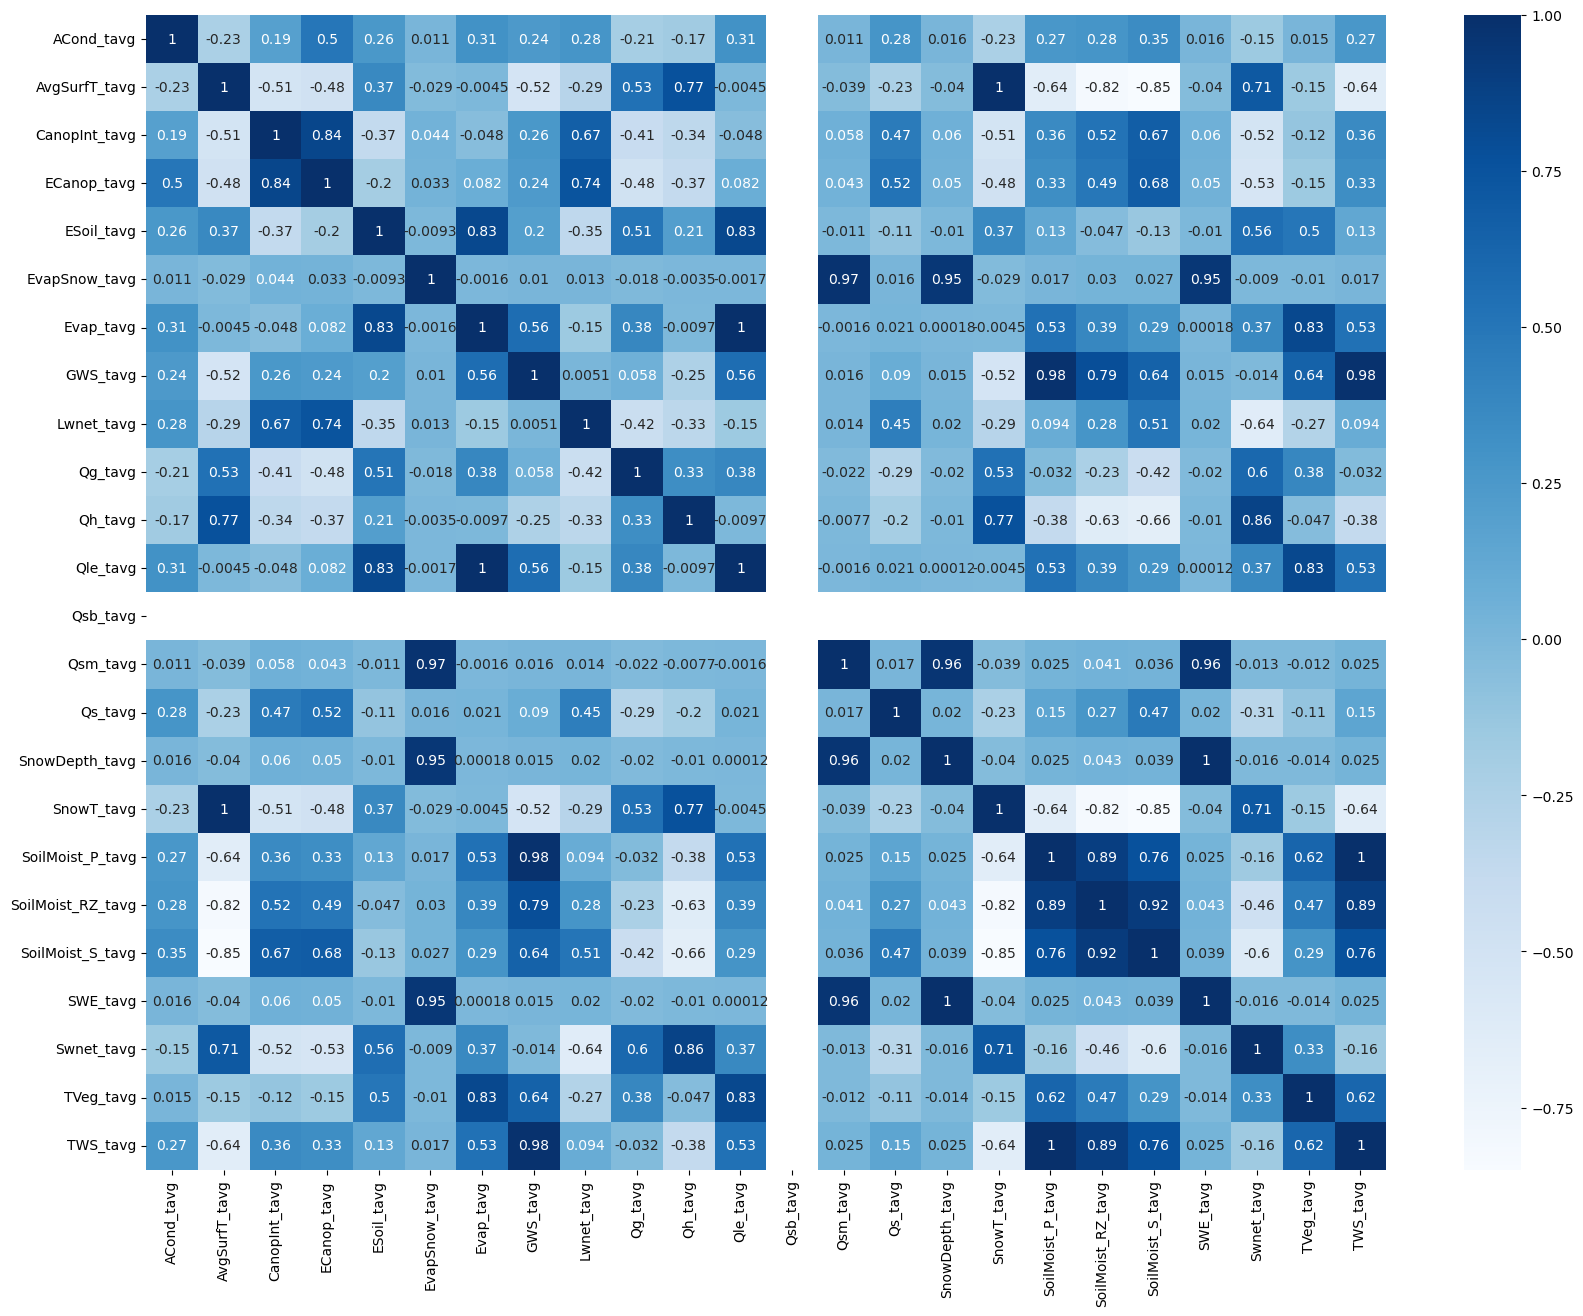

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

From the above heat map We need to drop some columns

In [14]:
df.columns

Index(['date', 'city', 'ACond_tavg', 'AvgSurfT_tavg', 'CanopInt_tavg',
       'ECanop_tavg', 'ESoil_tavg', 'EvapSnow_tavg', 'Evap_tavg', 'GWS_tavg',
       'Lwnet_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qsb_tavg', 'Qsm_tavg',
       'Qs_tavg', 'SnowDepth_tavg', 'SnowT_tavg', 'SoilMoist_P_tavg',
       'SoilMoist_RZ_tavg', 'SoilMoist_S_tavg', 'SWE_tavg', 'Swnet_tavg',
       'TVeg_tavg', 'TWS_tavg'],
      dtype='object')

In [15]:
df.drop(columns=['AvgSurfT_tavg','ECanop_tavg','ESoil_tavg','EvapSnow_tavg','GWS_tavg','Qle_tavg','Qsb_tavg','Qsm_tavg','SnowDepth_tavg',
       'SoilMoist_P_tavg','SoilMoist_RZ_tavg','SWE_tavg','Swnet_tavg','TVeg_tavg'],inplace=True)

### *Heatmap After removing columns*

<AxesSubplot:>

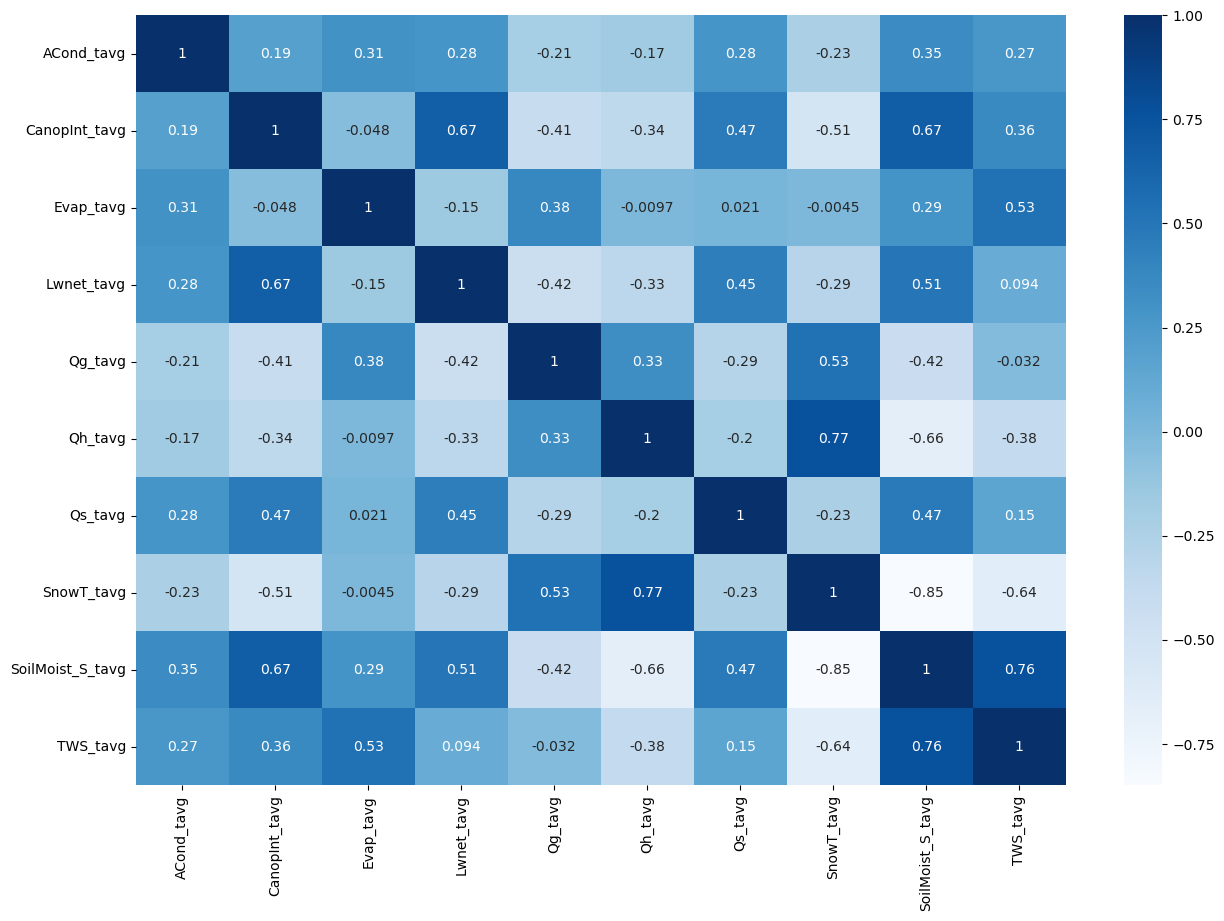

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

### Positive Correlation 

**TWS_tavg(Terrestrial water storage)**-->Evap_tavg(Evapotranspiration),SoilMoist_S_tavg(Surface soil moisture)

**SoilMoist_S_tavg(Surface soil moisture)**-->CanopInt_tavg(Plant canopy surface water),TWS_tavg(Terrestrial water storage)

**SnowT_tavg(Snow precipitation rate)**-->Qg_tavg(Heat flux),Qh_tavg(Sensible heat net flux)

**Qh_tavg(Sensible heat net flux)**-->SnowT_tavg(Snow precipitation rate)

**Qg_tavg(Heat flux)**-->SnowT_tavg(Snow precipitation rate)

**CanopInt_tavg(Plant canopy surface water)**-->Lwnet_tavg(=Net long-wave radiation flux),
SoilMoist_S_tavg(Surface soil moisture)

### Negetive Correlation

**TWS_tavg(Terrestrial water storage)**-->Qg_tavg(Heat flux),Qh_tavg(Sensible heat net flux),SnowT_tavg(Snow precipitation rate)

**SoilMoist_S_tavg(Surface soil moisture)**-->Qg_tavg(Heat flux),Qh_tavg(Sensible heat net flux),SnowT_tavg(Snow precipitation rate)

**SnowT_tavg(Snow precipitation rate)**-->ACond_tavg(Aerodynamic_conductunce),CanopInt_tavg(Plant canopy surface water),
Evap_tavg(Evapotranspiration),Lwnet_tavg(Net long-wave radiation flux),SoilMoist_S_tavg(Surface soil moisture),TWS_tavg(Terrestrial water storage)

**Qh_tavg(Sensible heat net flux)**-->ACond_tavg(Aerodynamic_conductunce),CanopInt_tavg(Plant canopy surface water),
Lwnet_tavg(Net long-wave radiation flux),Qs_tavg(Storm surface runoff),SoilMoist_S_tavg(Surface soil moisture)

**Qg_tavg(Heat flux)**-->ACond_tavg(Aerodynamic_conductunce),CanopInt_tavg(Plant canopy surface water),
Lwnet_tavg(Net long-wave radiation flux),SoilMoist_S_tavg(Surface soil moisture),
TWS_tavg(Terrestrial water storage)

**Lwnet_tavg(Net long-wave radiation flux)**--> Evap_tavg(Evapotranspiration),Qh_tavg(Sensible heat net flux),Qg_tavg(Heat flux),
SoilMoist_S_tavg(Surface soil moisture)

**Evap_tavg(Evapotranspiration)**-->Lwnet_tavg(Net long-wave radiation flux),SnowT_tavg(Snow precipitation rate)

**CanopInt_tavg(Plant canopy surface water)**-->Qg_tavg(Heat flux),Qh_tavg(Sensible heat net flux),SnowT_tavg(Snow precipitation rate)

**ACond_tavg(Aerodynamic_conductunce**-->Qg_tavg(Heat flux),Qh_tavg(Sensible heat net flux),SnowT_tavg(Snow precipitation rate)

All others are weekly correlated.It can't be considered

### Data sampling

In [17]:
sample=df.sample(frac=0.5,random_state=Random_seed)
sample.head()

date     city  ACond_tavg  CanopInt_tavg  Evap_tavg  Lwnet_tavg  \
4774  23-01-27  Algeirs    0.033949       0.079118   0.000013  -31.283197   
3398  19-04-22  Algeirs    0.064187       0.056949   0.000023  -18.535779   
889   12-06-08  Algeirs    0.035525       0.000680   0.000023  -65.932018   
4198  21-06-30  Algeirs    0.029705       0.000945   0.000011  -55.433692   
3553  19-09-24  Algeirs    0.014640       0.000110   0.000014  -58.545996   

       Qg_tavg     Qh_tavg       Qs_tavg  SnowT_tavg  SoilMoist_S_tavg  \
4774 -9.831551   21.467051  4.213413e-06  281.209604          5.589469   
3398 -4.737043   44.531413  2.317675e-06  288.736530          5.225095   
889  -4.614528  146.244597  4.821418e-11  299.281891          3.929437   
4198  3.054171  151.968184  1.864526e-09  300.265110          3.540665   
3553 -2.471581   84.973579  0.000000e+00  299.431201          3.876924   

        TWS_tavg  
4774  860.897884  
3398  921.174121  
889   878.094145  
4198  784.830606  
3553  793.331141

In [18]:
sample.shape

(2464, 12)

Here we can take the sample data for further processing

TWS_tavg(Terrestrial water storage is the main resource of water so we need to check which components are mostly realted to TWS_tavg).From correlation we can see TWS_tavg has high correlation between Evap_tavg(Evapotranspiration) and
SoilMoist_S_tavg(Surface soil moisture) and also can check for the CanopInt_tavg  which helpls to increase TWS

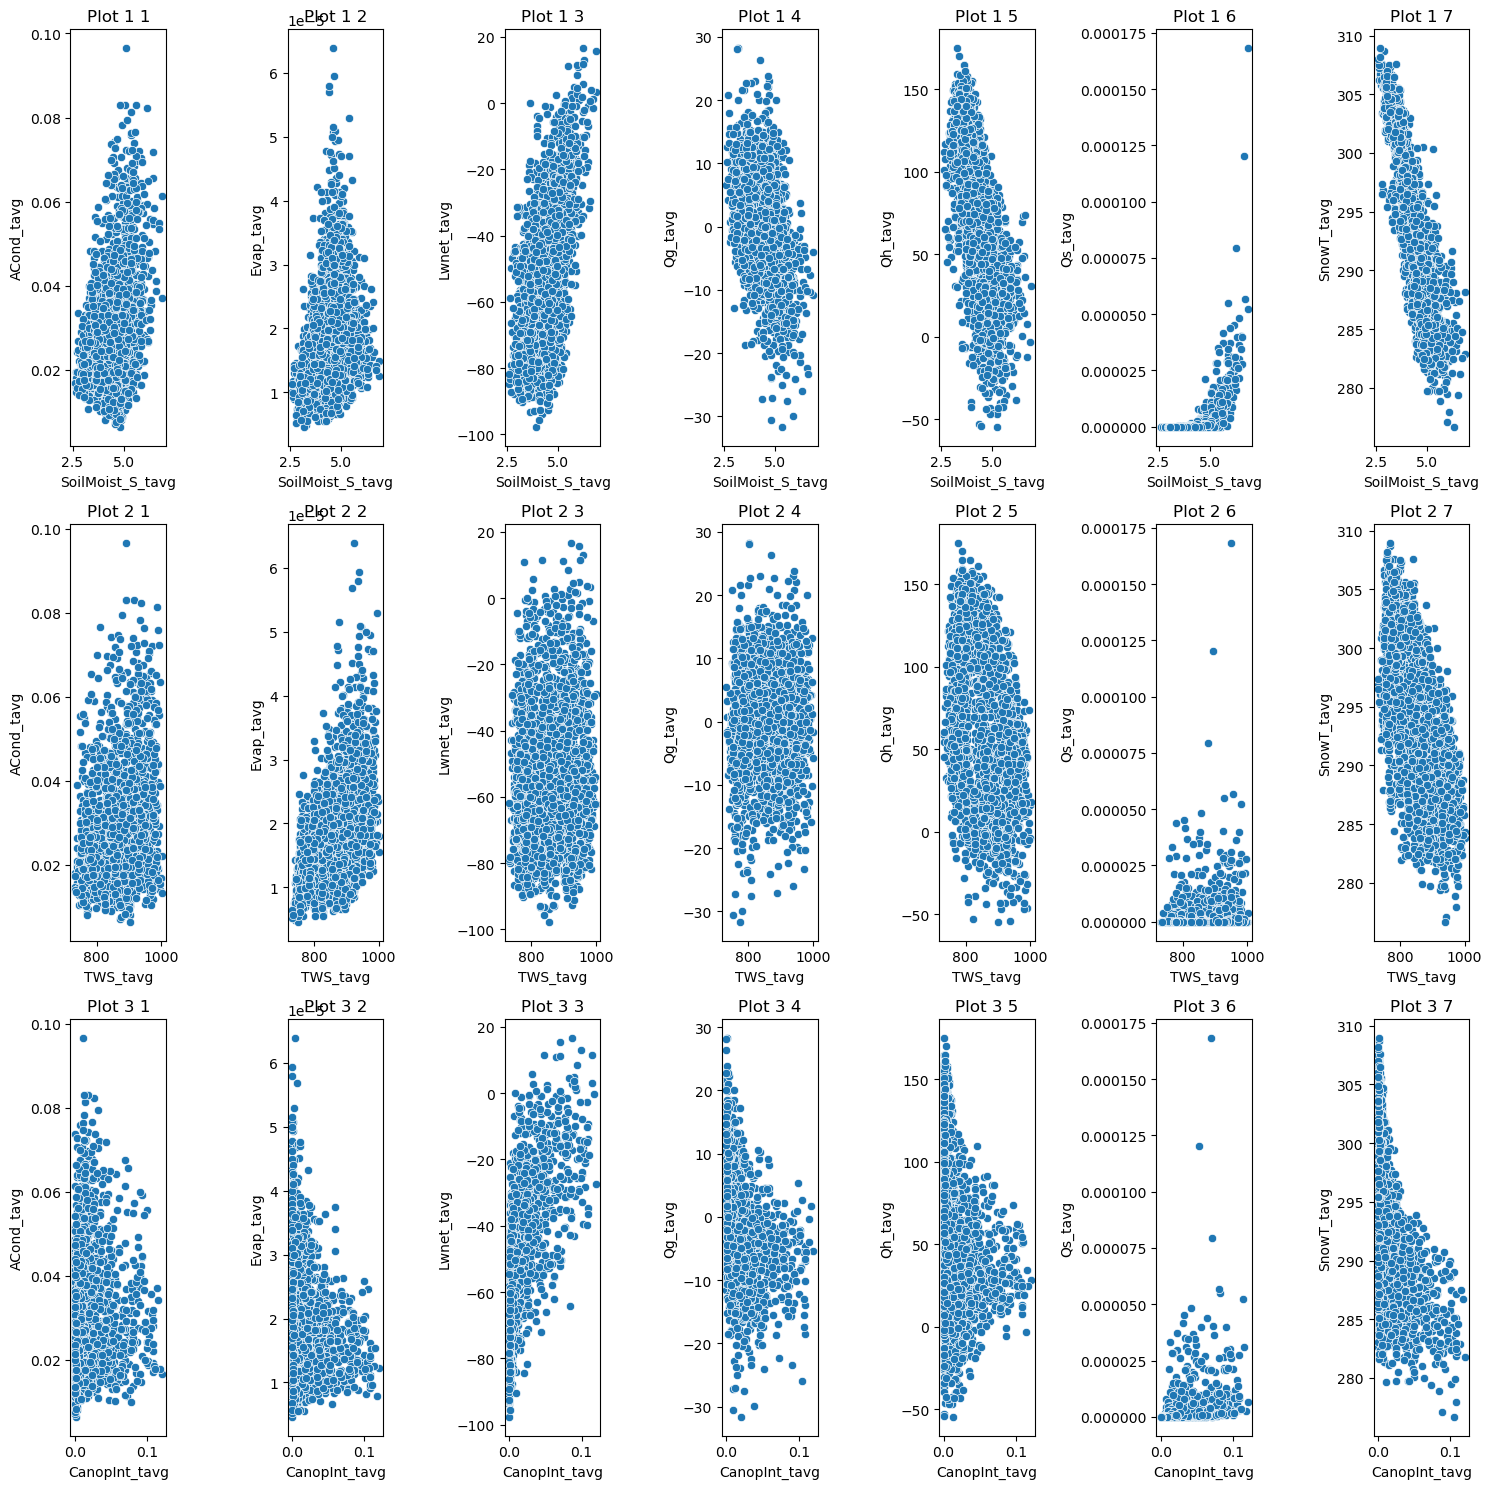

In [19]:
#for scatter plot
plt.figure(figsize=(15, 15))
target=['SoilMoist_S_tavg','TWS_tavg','CanopInt_tavg']
features=['ACond_tavg', 'Evap_tavg','Lwnet_tavg', 'Qg_tavg',
          'Qh_tavg', 'Qs_tavg', 'SnowT_tavg']

# Loop through each subplot
for i, target in enumerate(target):
    for j, k in enumerate(features):
        plt.subplot(3, 7, i * 7 + j + 1)
        sns.scatterplot(x=target, y=k, data=sample)
        plt.title(f'Plot {i + 1} {j + 1}')

plt.tight_layout()
plt.show()

In [22]:
sample.info() # checking the variable type

for i in sample.columns:
    print(f"The unique values for {i} column: \n", sample[i].unique())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 4774 to 772
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2464 non-null   object 
 1   city              2464 non-null   object 
 2   ACond_tavg        2464 non-null   float64
 3   CanopInt_tavg     2464 non-null   float64
 4   Evap_tavg         2464 non-null   float64
 5   Lwnet_tavg        2464 non-null   float64
 6   Qg_tavg           2464 non-null   float64
 7   Qh_tavg           2464 non-null   float64
 8   Qs_tavg           2464 non-null   float64
 9   SnowT_tavg        2464 non-null   float64
 10  SoilMoist_S_tavg  2464 non-null   float64
 11  TWS_tavg          2464 non-null   float64
dtypes: float64(10), object(2)
memory usage: 250.2+ KB
The unique values for date column: 
 ['23-01-27' '19-04-22' '12-06-08' ... '15-07-31' '21-07-06' '12-02-12']

The unique values for city column: 
 ['Algeirs']

The unique values 

### *Univariate Anlaysis*

### Finding the frequency 

In [25]:
count = sample.groupby(['city', 'ACond_tavg', 'CanopInt_tavg', 'Evap_tavg', 'Lwnet_tavg',
       'Qg_tavg', 'Qh_tavg', 'Qs_tavg', 'SnowT_tavg', 'SoilMoist_S_tavg',
       'TWS_tavg']).size() 
count 

city     ACond_tavg  CanopInt_tavg  Evap_tavg  Lwnet_tavg  Qg_tavg     Qh_tavg     Qs_tavg       SnowT_tavg  SoilMoist_S_tavg  TWS_tavg  
Algeirs  0.006431    0.001192       0.000010   -64.705467  -4.559107    10.557984  0.000000e+00  285.377109  4.808272          901.777824    1
         0.006984    0.000553       0.000010   -60.727404  -0.642537    12.948052  0.000000e+00  288.814398  4.571437          873.257367    1
         0.007248    0.000702       0.000011   -61.240950  -1.050007    12.463099  0.000000e+00  288.414819  4.577080          873.826510    1
         0.007471    0.000674       0.000013   -72.237996  -10.587386   12.440362  0.000000e+00  285.898005  4.630850          875.264815    1
         0.007921    0.000274       0.000009   -77.737227  -5.450777    18.062905  0.000000e+00  286.686179  4.098283          768.782150    1
                                                                                                                                            ..
    

From above count other than 'TWS_tavg'  we can see more frequncy data is SnowT_avg and lesser than that is SoilMoist_S_tavg and Qh_tavg.But Qh_tavghas negetive values.So we can consider SnowT_avg and SoilMoist_S_tavg

In [65]:
sample.describe()
# We can select what numerical variables we need in our descriptive analysis

ACond_tavg  CanopInt_tavg    Evap_tavg   Lwnet_tavg      Qg_tavg  \
count  2464.000000    2464.000000  2464.000000  2464.000000  2464.000000   
mean      0.027614       0.013551     0.000018   -53.577272     0.108361   
std       0.012718       0.021521     0.000008    20.362126     7.957571   
min       0.006431       0.000014     0.000005   -97.663288   -31.625584   
25%       0.018868       0.000737     0.000012   -68.922327    -4.866660   
50%       0.024415       0.003655     0.000017   -56.876119     0.153615   
75%       0.032546       0.016108     0.000022   -40.206251     5.552658   
max       0.096481       0.120044     0.000064    16.565141    28.209463   

           Qh_tavg       Qs_tavg   SnowT_tavg  SoilMoist_S_tavg     TWS_tavg  
count  2464.000000  2.464000e+03  2464.000000       2464.000000  2464.000000  
mean     62.694349  1.668058e-06   293.201132          4.367530   853.293262  
std      47.979363  6.760784e-06     6.814145          0.741569    65.183238  
min     -54.623176  0.000000e+00   276.692419          2.609250   731.995959  
25%      22.360859  0.000000e+00   287.435913          3.786575   796.326590  
50%      58.256987  6.736398e-09   292.342846          4.398623   851.498032  
75%     104.706315  3.224404e-07   299.266804          4.872889   903.495390  
max     174.758465  1.681358e-04   308.918751          6.864037  1001.167333

In [66]:
for i in sample[["TWS_tavg", "SoilMoist_S_tavg", "CanopInt_tavg", "Lwnet_tavg"]]:
    print(f"The value of median for column {i}: \n", sample[i].median())

The value of median for column TWS_tavg: 
 851.4980323791505
The value of median for column SoilMoist_S_tavg: 
 4.398622658848762
The value of median for column CanopInt_tavg: 
 0.00365512615389885
The value of median for column Lwnet_tavg: 
 -56.87611896197001


In [67]:
for i in sample[["SnowT_tavg", "SoilMoist_S_tavg", "Qh_tavg"]]:
    fig = px.histogram(sample, x=i, title="Distribution of the component {i}")
    #"fig.update_layout( xaxis={'ACond_tavg':'total descending'})
    fig.show()

*So we can consider SnowT_avg for univariate anlysis*

In [27]:
skew(sample.SnowT_tavg, axis=0, bias=True)

0.20902764395939635

Here we get the skewness is positive and the data is normal

In [28]:
kurtosis(sample.SnowT_tavg, bias = False)

-1.1022933234231993

In [29]:
sample .columns

Index(['date', 'city', 'ACond_tavg', 'CanopInt_tavg', 'Evap_tavg',
       'Lwnet_tavg', 'Qg_tavg', 'Qh_tavg', 'Qs_tavg', 'SnowT_tavg',
       'SoilMoist_S_tavg', 'TWS_tavg'],
      dtype='object')

From above analysis we got the Kurthosis value is negetive and the peak is low

We can plot the subplots for other components except SnowT_tavg and TWS_tawg to understand the distribution 

In [30]:
for i in sample[["CanopInt_tavg","ACond_tavg", "Evap_tavg","Lwnet_tavg", "Qg_tavg","Qh_tavg", "Qs_tavg","SoilMoist_S_tavg"]]:
    figure=px.histogram(sample,x=i,title=f'{i} by time')
    figure.update_layout(autosize=False,width=1000,height=500,)
    figure.show()



### *Stationarity Check*

In [31]:
ACond_tavg=sample.ACond_tavg
res=adfuller(ACond_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -48.870645
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the Aerodynamic conductance data is stationary

In [32]:
CanopInt_tavg=sample.CanopInt_tavg
res=adfuller(CanopInt_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -49.233129
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that plant canopy water series is stationary

In [33]:
Evap_tavg=sample.Evap_tavg
res=adfuller(Evap_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -50.026093
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the evapotranspiration data is stationary

In [34]:
Lwnet_tavg=sample.Lwnet_tavg
res=adfuller(Lwnet_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -49.051495
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the Net long wave radiation flux is stationary

In [35]:
Qg_tavg=sample.Qg_tavg
res=adfuller(Qg_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -27.743510
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the heat flux is stationary

In [36]:
Qh_tavg=sample.Qh_tavg
res=adfuller(Qh_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -17.874258
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the sensible heat flux is stationary

In [37]:
Qs_tavg=sample.Qs_tavg
res=adfuller(Qs_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -8.860867
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the storm surface runoff series is stationary

In [38]:
SnowT_tavg=sample.SnowT_tavg
res=adfuller(SnowT_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -11.160139
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the snow surface temperature is stationary

In [39]:
SoilMoist_S_tavg=sample.SoilMoist_S_tavg
res=adfuller(SoilMoist_S_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -49.429810
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the surface soi moisture is stationary

In [40]:
TWS_tavg=sample.TWS_tavg
res=adfuller(TWS_tavg)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -49.421164
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The test statistics is more negetive then we can reject the null hypothesis and conclude that the terrestrial water storage is stationary

From above analysis we can't do any furher checking for trends beacause the all the components are stationary

In [41]:
sample.columns

Index(['date', 'city', 'ACond_tavg', 'CanopInt_tavg', 'Evap_tavg',
       'Lwnet_tavg', 'Qg_tavg', 'Qh_tavg', 'Qs_tavg', 'SnowT_tavg',
       'SoilMoist_S_tavg', 'TWS_tavg'],
      dtype='object')

Here we choose for additive decomposition beacause the seasonal variation is constant over time.

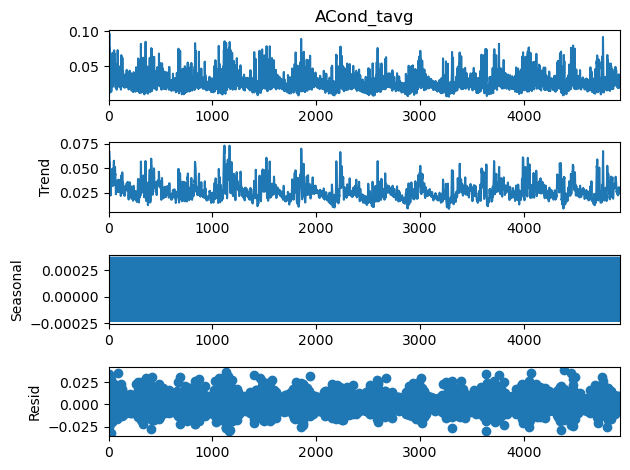

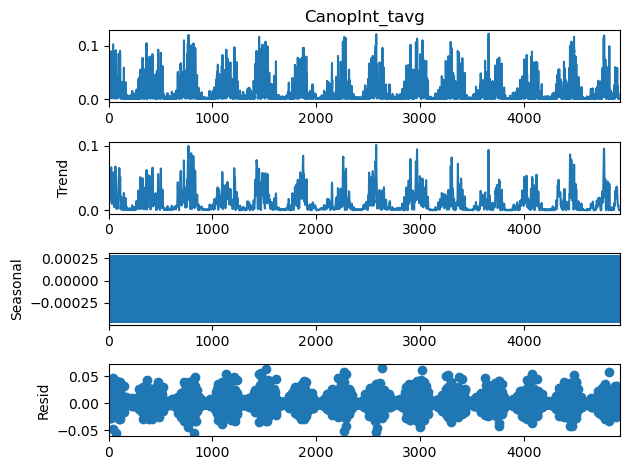

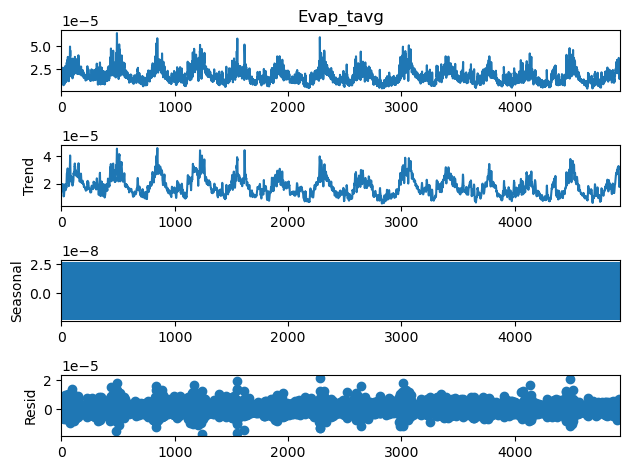

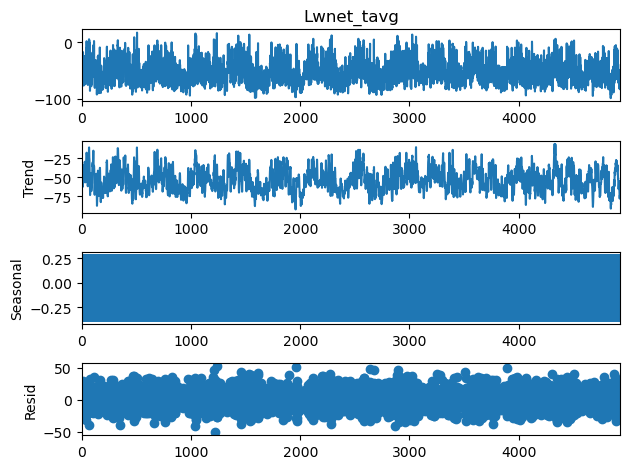

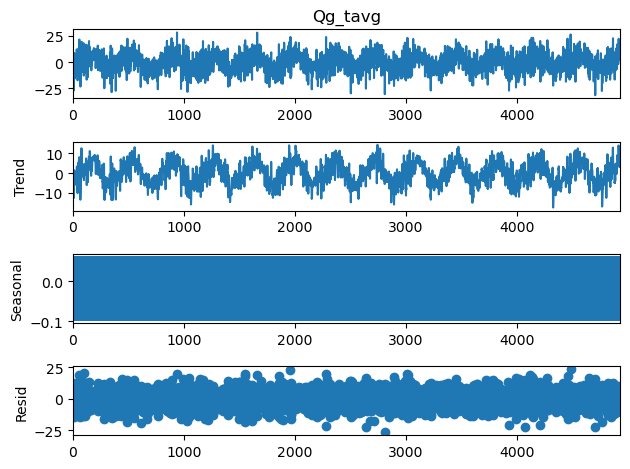

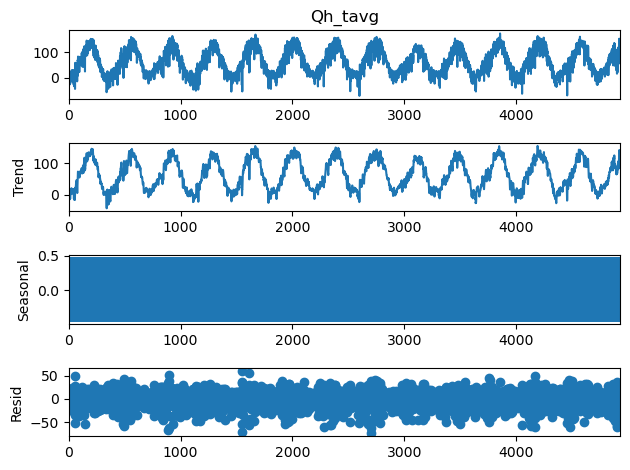

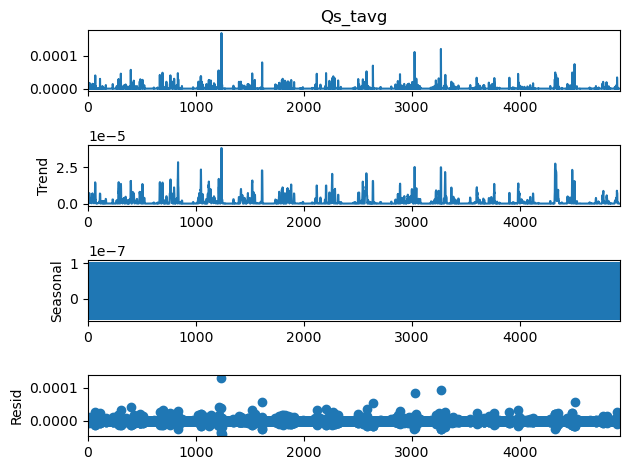

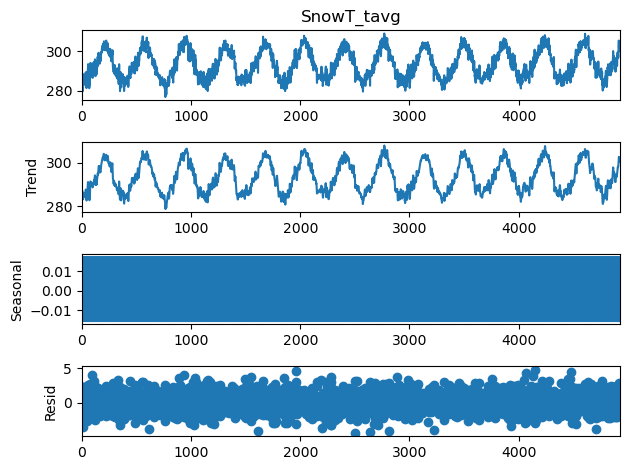

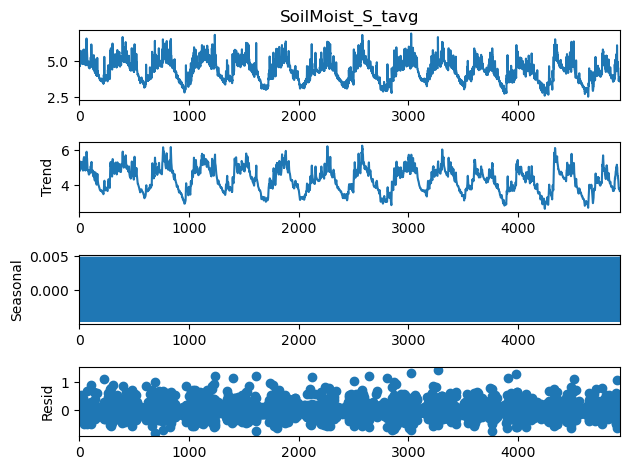

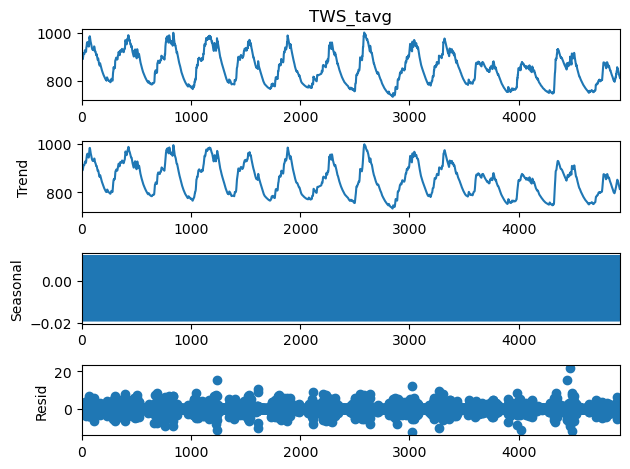

In [42]:
for i in df[['ACond_tavg', 'CanopInt_tavg', 'Evap_tavg','Lwnet_tavg', 'Qg_tavg', 'Qh_tavg', 'Qs_tavg', 'SnowT_tavg','SoilMoist_S_tavg', 'TWS_tavg']]:
    result = seasonal_decompose(df[i],model='additive', period=5)
    result.plot()

### *Autocorrelation and Partial Correlation*

**Autocorrelation** refers to the degree of correlation of the same variables between two successive time intervals.

**Partial autocorrelation** removes the influence of intermediate lags, providing a clearer picture of the direct relationship between a variable and its past values

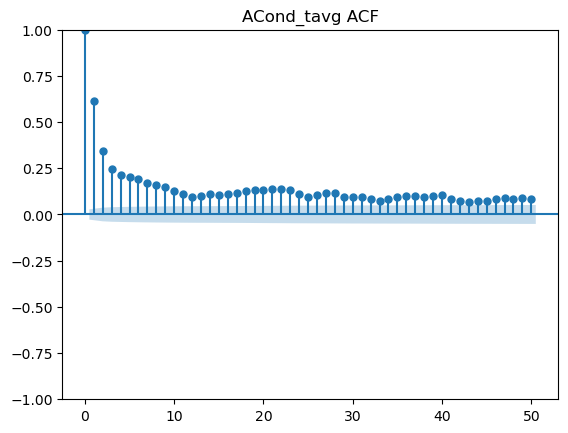

In [43]:
plot_acf(df['ACond_tavg'],lags=50)
plt.title(label="ACond_tavg ACF")
plt.show()

**ACond_tavg**
The ACF graph is decreased and then after a variying diffence is showing but not increasing exponentially


E:\python\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



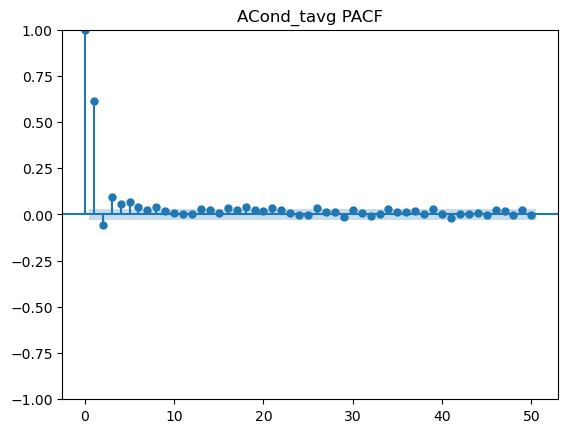

In [44]:
plot_pacf(df['ACond_tavg'], lags=50)
plt.title(label="ACond_tavg PACF")
plt.show()

**ACond_tavg**:PACF is abrupted with lags.

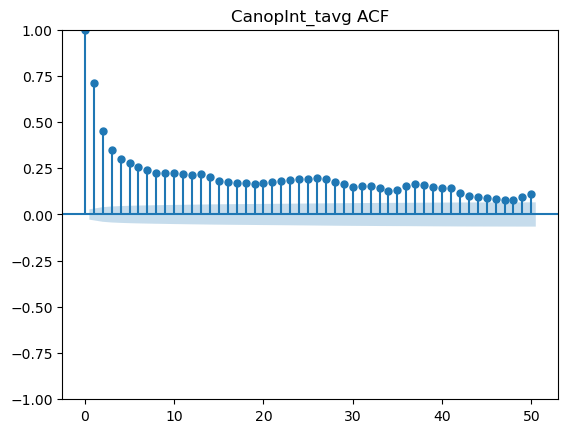

In [45]:
plot_acf(df['CanopInt_tavg'],lags=50)
plt.title(label="CanopInt_tavg ACF")
plt.show()

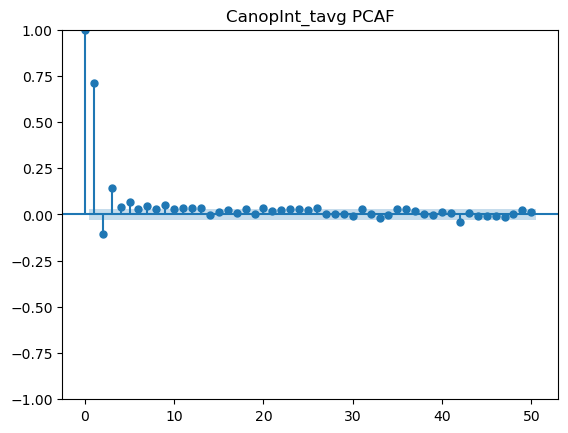

In [46]:
plot_pacf(df['CanopInt_tavg'], lags=50)
plt.title(label="CanopInt_tavg PCAF")
plt.show()

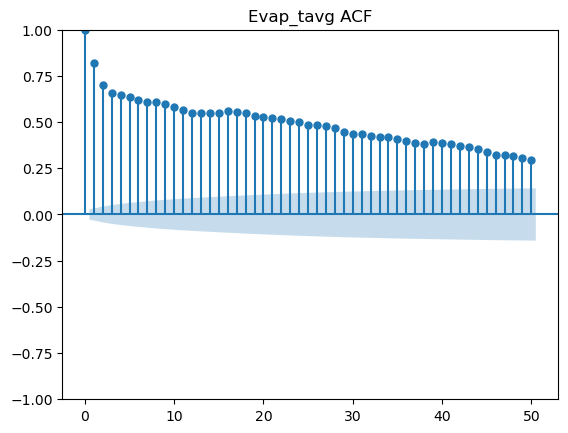

In [47]:
plot_acf(df['Evap_tavg'],lags=50)
plt.title(label="Evap_tavg ACF")
plt.show()

Here shows an exponential decrease of Evapotranspiration

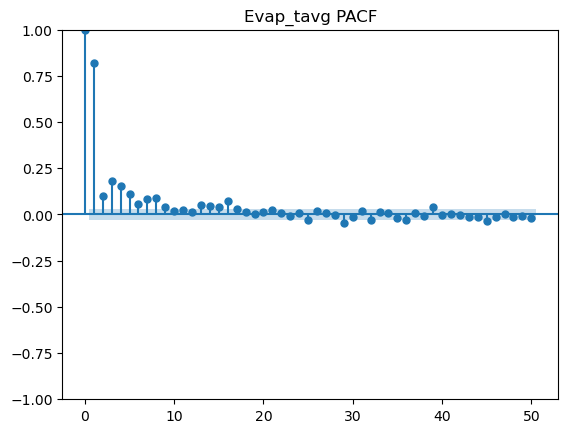

In [48]:
plot_pacf(df['Evap_tavg'], lags=50)
plt.title(label="Evap_tavg PACF")
plt.show()

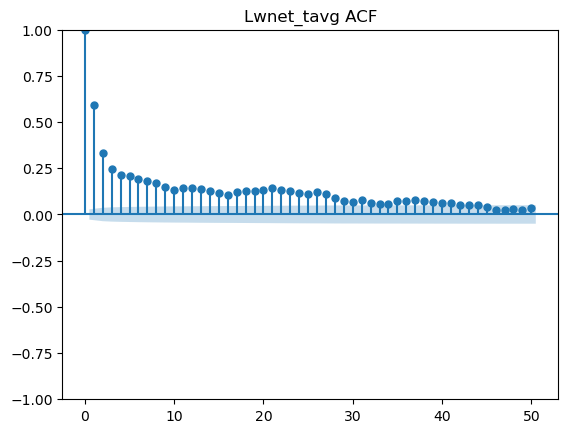

In [49]:
plot_acf(df["Lwnet_tavg"],lags=50)
plt.title(label="Lwnet_tavg ACF")
plt.show()

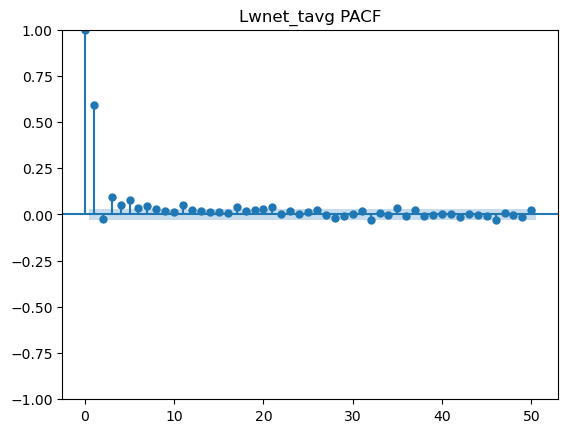

In [50]:
plot_pacf(df['Lwnet_tavg'], lags=50)
plt.title(label="Lwnet_tavg PACF")
plt.show()

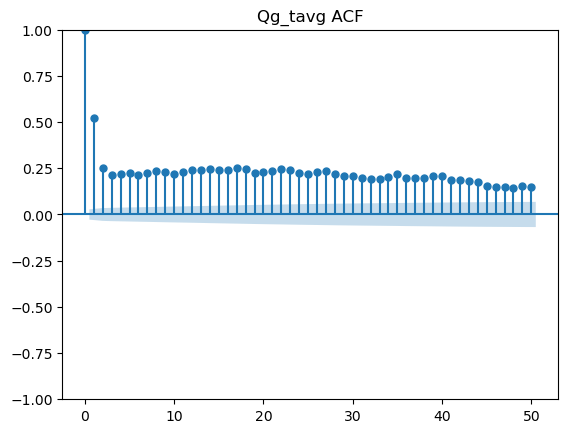

In [51]:
plot_acf(df['Qg_tavg'],lags=50)
plt.title(label="Qg_tavg ACF")
plt.show()

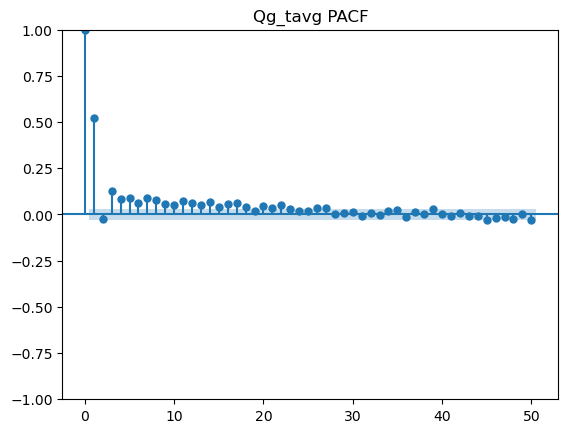

In [52]:
plot_pacf(df['Qg_tavg'], lags=50)
plt.title(label="Qg_tavg PACF")
plt.show()

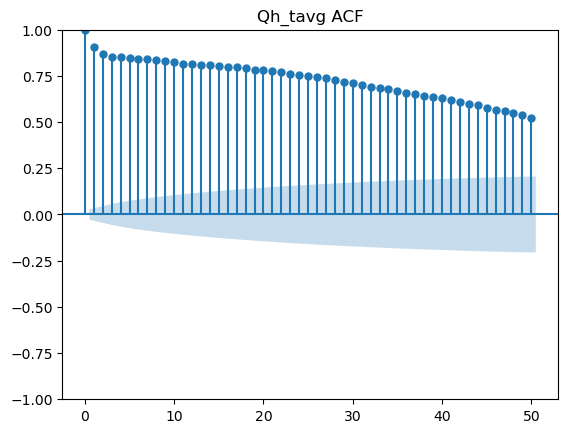

In [53]:
plot_acf(df['Qh_tavg'],lags=50)
plt.title(label="Qh_tavg ACF")
plt.show()

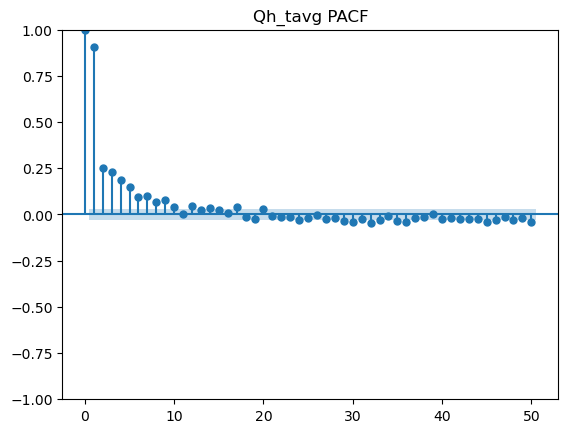

In [54]:
plot_pacf(df['Qh_tavg'], lags=50)
plt.title(label="Qh_tavg PACF")
plt.show()

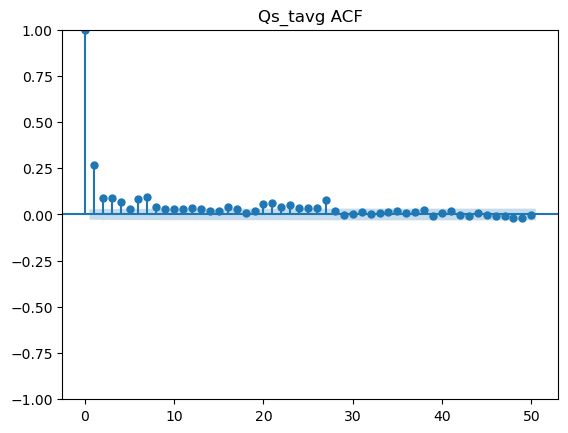

In [55]:
plot_acf(df['Qs_tavg'],lags=50)
plt.title(label="Qs_tavg ACF")
plt.show()

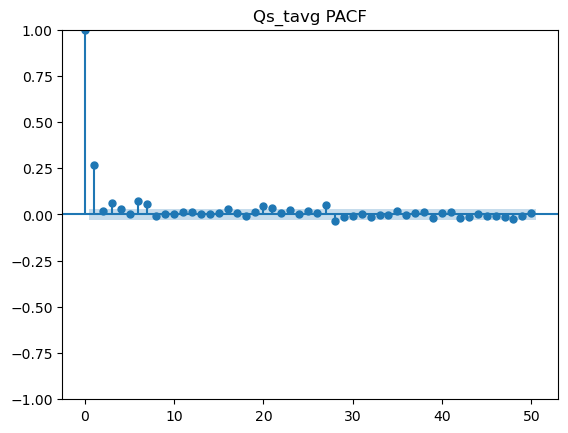

In [56]:
plot_pacf(df['Qs_tavg'], lags=50)
plt.title(label="Qs_tavg PACF")
plt.show()

Here both ACF and PACF are abrubting

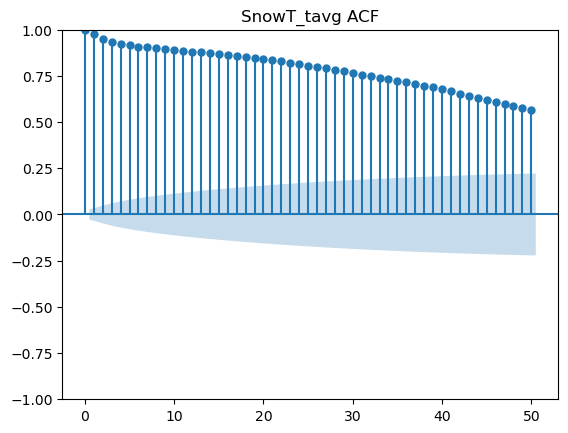

In [57]:
plot_acf(df['SnowT_tavg'],lags=50)
plt.title(label="SnowT_tavg ACF")
plt.show()

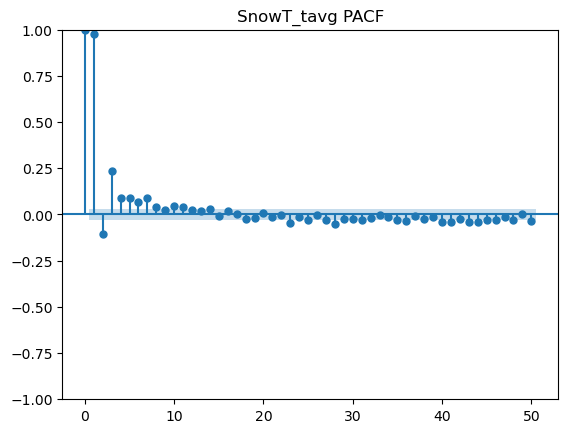

In [58]:
plot_pacf(df['SnowT_tavg'], lags=50)
plt.title(label="SnowT_tavg PACF")
plt.show()

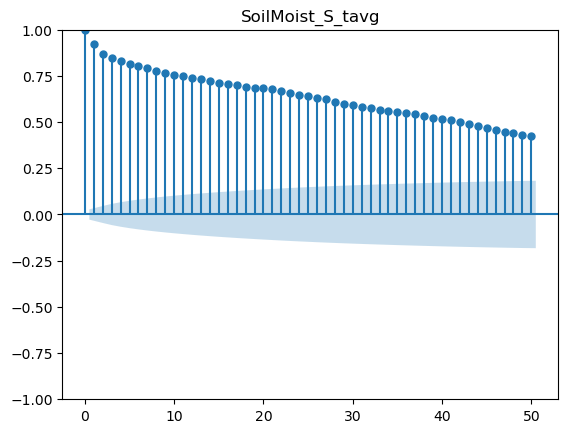

In [59]:
plot_acf(df['SoilMoist_S_tavg'],lags=50)
plt.title(label="SoilMoist_S_tavg")
plt.show()

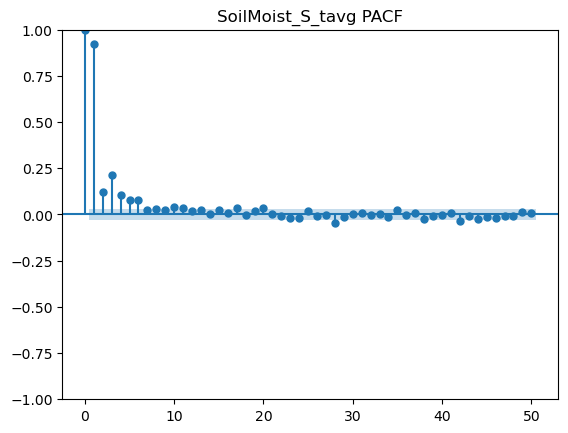

In [60]:
plot_pacf(df['SoilMoist_S_tavg'], lags=50)
plt.title(label="SoilMoist_S_tavg PACF")
plt.show()

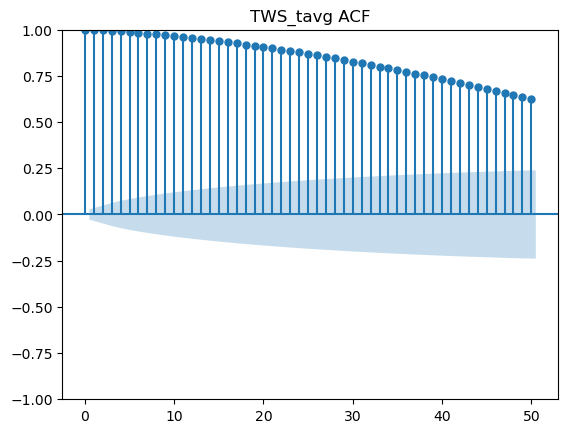

In [61]:
plot_acf(df['TWS_tavg'],lags=50)
plt.title(label="TWS_tavg ACF")
plt.show()

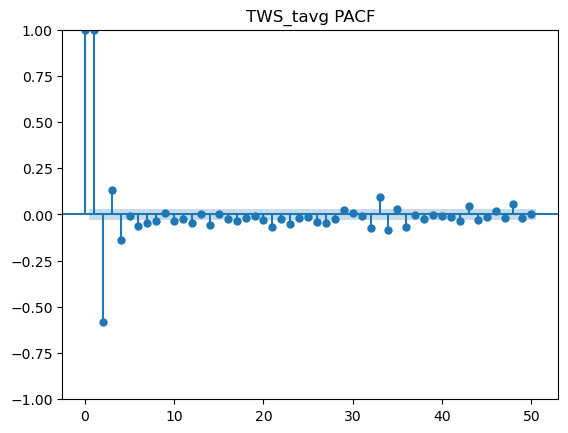

In [62]:
plot_pacf(df['TWS_tavg'], lags=50)
plt.title(label="TWS_tavg PACF")
plt.show()

From above graph we can see rapid decay to zero in both functions is an indication of stationarity.
Also there is strong correlation having the components TWS and SnowT.From above analysis we can conclude that ARIMA model is suitable for modelling